## Locally weighted regression
1. read and normalize the data
2. generate w for every point
3. no training required , generate prediction directly using closed form solution theta=(x'wx)inv * x'wy
4. find the best value of tau (bandwidth parameter)[cross validation]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
%matplotlib inline

In [4]:
dfx=pd.read_csv("weightedX.csv")
dfy=pd.read_csv("weightedY.csv")

In [5]:
x=dfx.values
y=dfy.values

In [6]:
x.shape,y.shape

((99, 1), (99, 1))

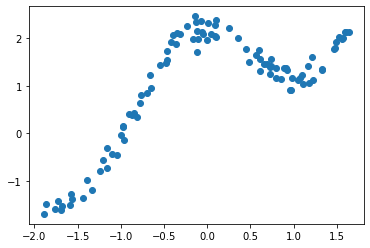

In [7]:
# normalize the data
x=(x-x.mean())/x.std()
plt.scatter(x,y)
plt.show()

In [8]:
np.mat(np.eye(5))
## converting to matrix so that a*b do matrix multiplication not array mul

matrix([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [9]:
def getw(query_point,x,tau):
    m=x.shape[0]
    w=np.mat(np.eye(m))
    for i in range(m):
        w[i,i]=np.exp(np.dot((x[i]-query_point),(x[i]-query_point).T)/(-2*tau*tau))
    return w

In [10]:
x=np.mat(x)
y=np.mat(y)

w=getw(-1,x,-1)

In [11]:
print(w)

[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


## make predictions

In [12]:
def predict(x,y,query_x,tau):
    m=x.shape[0]
    # making a dummy 1 column to match with features
    ones =np.ones((m,1))
    x_=np.hstack((x,ones))
    
    qx=np.mat([query_x,1])
    w=getw(qx,x_,tau)
    
#    theta=(x'wx)inv * x'wy
    theta=np.linalg.pinv(x_.T*(w*x_))*(x_.T*(w*y))
    pred=np.dot(qx,theta)
    return theta,pred

In [13]:
theta,pred=predict(x,y,1.0,1.0)

In [14]:
pred # means for query point close to one pred value is 1.59

matrix([[1.59417694]])

## visual prediction,analysize the effect of tau



In [15]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(x,,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()
    
        

In [16]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)

NameError: name 'X' is not defined